<a href="https://colab.research.google.com/github/simranbains9810/anomaly_detection/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊⏳ Anomaly Detection in Multivariate Time-Series ⏳📊**

### Table of Contents
1. [Problem Statement 1: Stock Trends 📈](#1️⃣-problem-statement-1-stock-trends-📈)
- [1.1 Autoencoders](#11-autoencoders)
- [1.2 Analysis 📝](#12-analysis-📝)
- [1.3 Accuracy 🎯](#13-accuracy-🎯)



### 1️⃣ Problem Statement 1: Stock Trends 📈

---

The objective of detecting anomalies in stock price movements is to identify irregular trends, unexpected price fluctuations, and unusual trading patterns. Achieving this requires an anomaly detection system capable of analyzing all trading sequences to extract key performance metrics.

A stock's price reflects the market's assessment of its value, influenced by factors such as demand, supply, and external events. By monitoring historical and real-time price data, anomaly detection systems can uncover irregularities that may indicate market inefficiencies, unusual activity, or emerging trends.

![Trading Volume Over Time](https://miro.medium.com/v2/resize:fit:1400/1*FSXgVCGI-40z1OFfE9wAZw.png)

## Autoencoders
Autoencoders are unsupervised artificial neural networks that learn how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.


Autoencoders are a powerful tool for detecting anomalies, extracting features, and reducing noise in stock data. They help analysts and algorithms uncover hidden patterns and identify unusual behavior, making them valuable in trading strategies, market monitoring, and risk management. However, they should be complemented with other models and domain knowledge to handle the complexities of financial markets effectively.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

In [5]:
uploaded = files.upload()

Saving stock_trend.csv to stock_trend.csv


In [6]:
df = pd.read_csv("stock_trend.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


👉🏻 Note: The dataset has 140 columns which represents the stock readings and a labels column which has been encoded to 0 or 1 showing whether the stock is performing abnormal or normal.

In [11]:
#separate the data and labels so that it will be easy for understanding
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [13]:
#Now lets Normalize the data to range [0, -1]
#First we will calculate the maximum and minimum value from the training set
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#Converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [14]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal stock data from that of abnormal ones
#Normal stock data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal stock data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


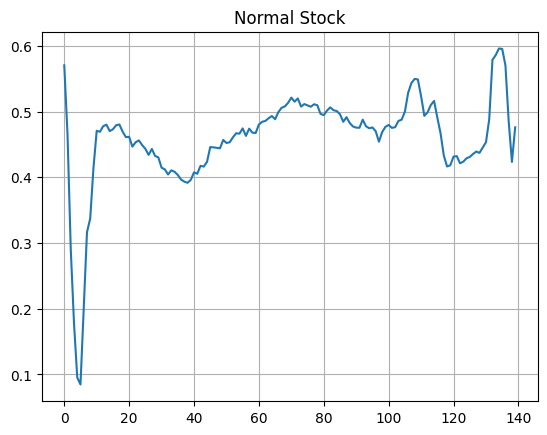

In [16]:
#Lets plot a normal stock
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal Stock')
plt.show()

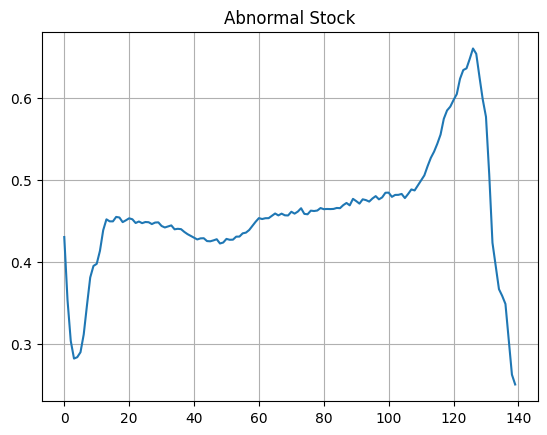

In [17]:
#Lets plot one from abnormal stock
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal Stock')
plt.show()

### 1.1 Autoencoders

![Trading Volume Over Time](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)



Autoencoders are a specific type of feedforward neural network.

It consists of two parts:- 1.Encoder 2.Decoder

##1.2 Analysis 🗒

❓ How the model will detect anomaly ❓

We will create an encoder and a decoder using an ANN architecture. We are going to provide the stock data as input and the model will try to reconstruct it. The error between the original data and reconstructed output will be called the reconstruction error. Based on this recostruction error we are going to classify a stock as anomalous or not. In order to do this we are going to train the model only on the normal stock data but it will be tested on the full test set, so that when an abnormal stock is provided in the input the autoencoder will try to reconstruct it but since it has been only trained on normal stock data the output will have a larger reconstruction error. We will also define a minimum threshold for the error i.e. if the reconstruction error is above the threshold then it will be categorised as anomalous.

For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional representation, then decodes it back to an image. It learns to compress the data while minimizing the reconstruction error.

![Encoder Decoder](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png)

*👉🏻 In simple words, AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data.*

The encoder is a neural network that compresses the input data into a smaller, latent representation:

* Input Layer: Not explicitly defined, but the first dense layer expects input of size 140 (the input data's dimension).
Hidden Layers:
* First Layer: Reduces input to 32 dimensions.
* Second Layer: Further reduces to 16 dimensions.
* Third Layer: Compresses to an 8-dimensional latent space.
* Activation: ReLU (Rectified Linear Unit) is used to introduce non-linearity.


The decoder is a neural network that reconstructs the original data from the compressed latent representation:
* Input Layer: Takes an 8-dimensional latent representation.
* Hidden Layers:
   -  First Layer: Expands to 16 dimensions.
   - Second Layer: Expands further to 32 dimensions.
   - Third Layer: Outputs the original size (140 dimensions).
* Activation:
    - ReLU for intermediate layers to maintain non-linearity.
    - Sigmoid for the output layer to squash the output to the range [0, 1], matching normalized input data.

In [18]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#This code defines an autoencoder model and uses TensorFlow's Model Subclassing API
#The model has 2 parts : 1. Encoder and 2. Decoder

class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


Autoencoders are unsupervised learning models but here we are training them using supervised method so its more like they are used as self-supervised.

In [19]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0578 - val_loss: 0.0556
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0550 - val_loss: 0.0524
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0517 - val_loss: 0.0486
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0477 - val_loss: 0.0445
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0437 - val_loss: 0.0407
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - val_loss: 0.0372
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0366 - val_loss: 0.0344
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0340 - val_loss: 0.0320
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0315 - val_loss: 0.0300
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0300 - val_loss: 0.0285
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0283 - val_loss: 0.0271
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0259
Ep

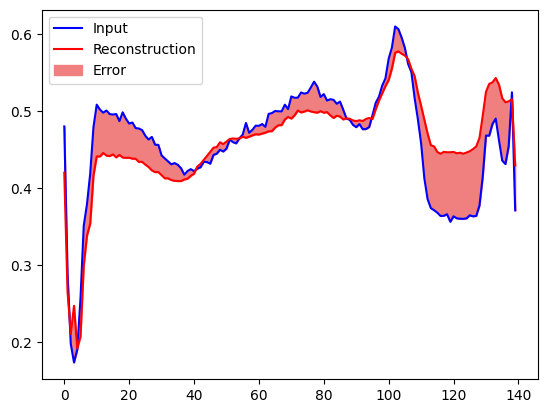

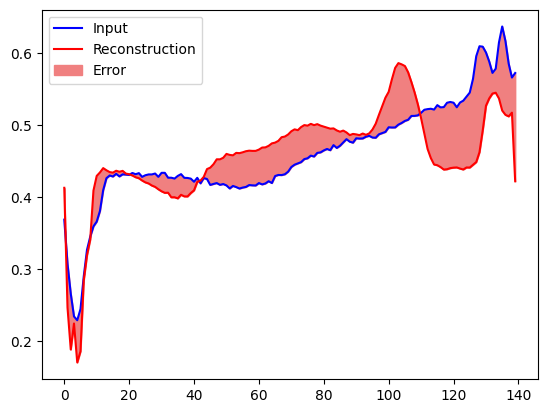

In [20]:
#Now let's define a function in order to plot the original stock and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

We can set the threshold in any way we want. Here I am going to set it to one standard deviation from the mean of normal training data.

In [21]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)
print(t)

0.032710258


In [22]:
pred = prediction(autoencoder, n_test_data, t)
print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

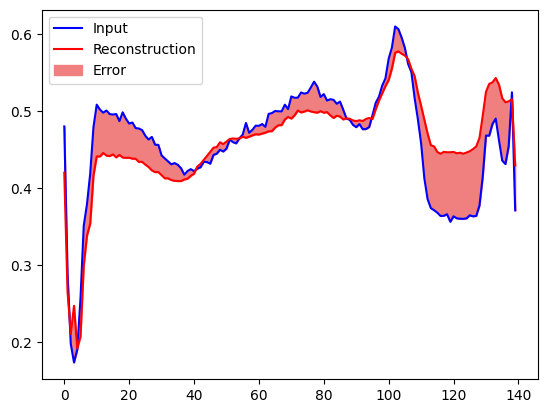

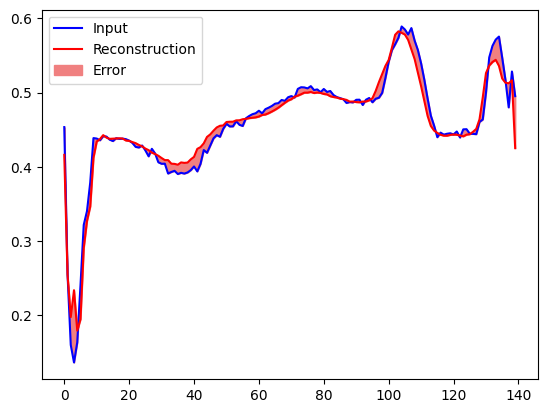

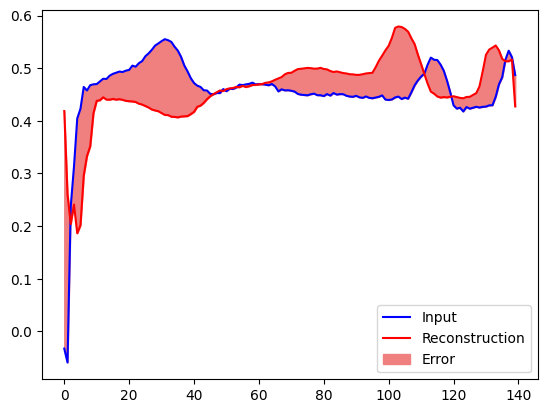

In [23]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)

This model was just the basic model and it can be improved by doing hyperparameter tuning and making the encoder and decoder with DNN. The threshold was determined using a very simple method and it can be also changed for getting better and more accurate results. The criteria for determinig the threshold can make a lot of difference

###1.3 Accuracy 🎯

The accuracy metrics used here focus on comparing the reconstruction error of the autoencoder to a predefined threshold, followed by evaluating the proportion of correctly identified samples.

In [24]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)
preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=2240>

In [25]:
preds.shape

TensorShape([2359])

In [26]:
acc = 2240/2359*100
print("Accuracy = ", acc, "%")

Accuracy =  94.95548961424333 %


Out of 2359 Actual Shape of Prediction, 2240 were predicted correctly. This results in accuracy ≈ 94.96 %

### 2️⃣ Problem Statement 2: Expedia Hotel 🏨

In [41]:
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
plt.style.use(['default'])

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

# !pip install pyemma
# from pyemma import msm
# %matplotlib inline

import os

In [49]:
uploaded = files.upload()

Saving Month_Value_1.csv to Month_Value_1.csv


In [50]:
df1 = pd.read_csv("Month_Value_1.csv", header=None)
df1.head()

,0,1,2,3,4
0,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
1,01.01.2015,16010072.1195,12729,1257.76354148008,30024676
2,01.02.2015,15807587.449808,11636,1358.50699981162,30024676
3,01.03.2015,22047146.023644,15922,1384.69702447205,30024676
4,01.04.2015,18814583.29428,15227,1235.60670481907,30024676
